# Reinforcement Learning - Lab 4 (graded)
### J. Martinet

Implement Q-learning from scratch

Duration: 90 min

### 1) First version with a 1D grid world


We have discussed Q-learning during the class. As you know, it is an off-policy algorithm that uses the Time Difference $\delta_t$, which is the difference between the estimated value of $s_t$ and the better estimate $r_{t+1} + \gamma V^\pi (s_{t+1})$

$$ \delta_t = r_{t+1} + \gamma V^\pi (s_{t+1}) - V^\pi (s_t) $$

The general definition of Q-learning update rule is:

$$ Q(s_t,a_t) \leftarrow Q(s_t,a_t) + \alpha[ r_{t+1} + \gamma \max_a Q(s_{t+1}, a) - Q(s_t,a_t) ] $$


In this part, we are going to implement Q-learning in the simple setting of a 1D grid world:

![1D grid world](RL4_1dgrid.png)

Make sure you understand:
- the size of the grid world (= number of states)
- the size of the action space (= number of possible actions)
- the size of the Q-table
- the expected reward for reaching each state

The first step will be to initialize an empty Q-table, a table of rewards, a move cost, and alpha and gamma parameters.

In [24]:
%pip install numpy matplotlib
import numpy as np
import random
import matplotlib.pyplot as plt

# we have 2 actions : move left and move right
nb_action = 2
nb_state = 6

# we create a matrix 6*2 to represent the value of each move at a given state
QTable = np.zeros((nb_state,nb_action))

# the tab with the representation of the 6 states (-1 for the bad end, 1 for the good end, and 0 for other states)
reward = [-1,0,0,0,0,1 ]

# cost of one move
cost = 0.01

# learning rate - should not be too high, e.g. between .5 and .9
alpha = 0.9

# discount factor that shows how much you care about future (remember 0 for myopic)
gamma = 0.5

# exploration / exploitation trade-off
epsilon = 0.1

1321.66s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Note: you may need to restart the kernel to use updated packages.


Now comes the interesting part. You need to write the main Q-learning loop.

The first version will simply iterate:
- choose an action (by looking up in the Q-table! Choose the most interesting move)
- move
- update the Q-table

When you get this version, you can make it more complete to add the exploration/exploitation with the $\epsilon$-greedy version, by initializing an $\epsilon = 1$ that you decrease by e.g. 0.01 in each iteration.

In your main loop, start by drawing a random number. If it is lower that $\epsilon$, then EXPLORE (= take a random move), otherwise EXPLOIT (= choose the best move)

[[ 0.          0.        ]
 [-1.01111111  0.10416667]
 [ 0.04097222  0.23055556]
 [ 0.10416667  0.48333333]
 [ 0.23055556  0.98888889]
 [ 0.          0.        ]]


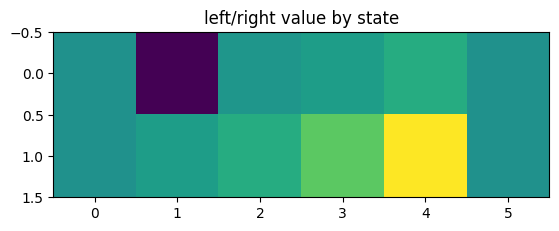

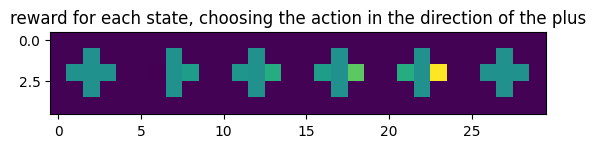

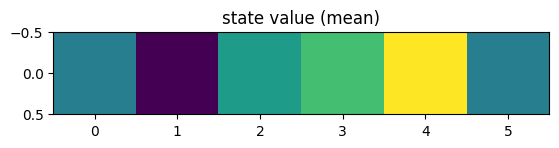

In [43]:
# we have 2 actions : move left and move right
nb_action = 2
nb_state = 6

# we create a matrix 6*2 to represent the value of each move at a given state
QTable = np.zeros((nb_state,nb_action))

# the tab with the representation of the 6 states (-1 for the bad end, 1 for the good end, and 0 for other states)
reward = [-1,0,0,0,0,1 ]            # maybe putting the move cost in the reward could be fine, but for now I add it in the QTable update

move_cost = 0.01


for i in range(1000):
    state = 2
    while state not in (0, 5):
        actions = []
        if random.random() > epsilon:
            actions = [0, 1]        # random on full possible actions, explore
        else:
            for index, rew in enumerate(QTable[state]):
                if rew == np.max(QTable[state]):
                    actions.append(index) # exploit max value
        action = random.choice(actions)

        # action = np.argmax(QTable[state])
        next_state = state + 1 if action == 1 else state - 1
        QTable[state, action] = (1 - alpha) * QTable[state, action] + alpha * (reward[next_state] + gamma * np.max(QTable[next_state])) - move_cost
        state = next_state


print(QTable)

# map of the QTable by state/action:

fig, ax = plt.subplots()
im = ax.imshow(QTable.T)
plt.title("left/right value by state")

plt.show()

# merged view of both directions in the same line:

new = np.zeros((5,5*nb_state))

around = np.ones((5,5)) * -1
around[1,2] = 0
around[2,2] = 0
around[3,2] = 0

for i in range(nb_state):
    new[:,i*5:i*5+5] = around
    new[2,i*5+1] = QTable[i,0]
    new[2,i*5+3] = QTable[i,1]

im = plt.imshow(new)
plt.title("reward for each state, choosing the action in the direction of the plus")
plt.show()

# mean value at each state:
mean = np.mean(QTable, axis=1)
im = plt.imshow([mean])
plt.title("state value (mean)")

plt.show()


![1D grid world](RL4_1dgrid.png)

Yellow is positive reward, purple is negative reward.

### 2) Second version with a 2D grid world

Same exercise, in the following 2D grid:

![2D grid world](RL4_2dgrid.png)

[[[ 0.04097222  0.10416667  0.23055556  0.10416667]
  [-0.01111111  0.23055556  0.48333333  0.10416667]
  [ 0.23055556  0.48333333  0.98888889  0.23055556]
  [ 0.          0.          0.          0.        ]]

 [[ 0.009375    0.10416667 -0.01111111  0.04097222]
  [ 0.          0.          0.          0.        ]
  [ 0.10416667  0.48333333 -1.01111111 -0.01111111]
  [ 0.          0.          0.          0.        ]]

 [[ 0.009375    0.04097222  0.04097222  0.009375  ]
  [ 0.04097222 -0.01111111  0.10416667  0.009375  ]
  [ 0.10416667  0.23055556  0.04097222  0.04097222]
  [ 0.04097222 -1.01111111  0.04097222  0.10416667]]]


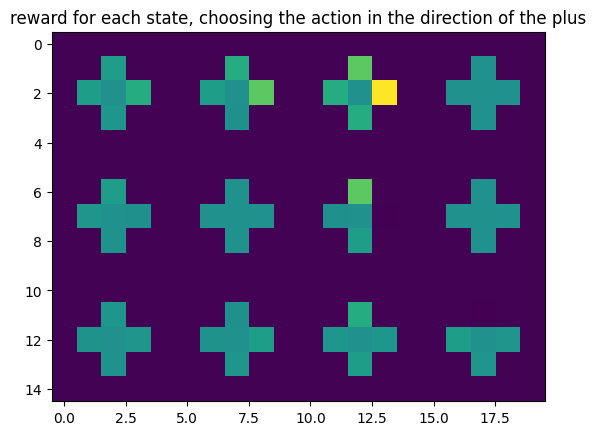

In [49]:
# we have 4 actions (every direction) although most of the time we will have only 2 actions available
nb_action = 4

# state will be a 2d array, also counting the impossible states to make it easier for the representation
#size is 4*3 so 12 states
nb_state_x = 3
nb_state_y = 4
nb_state = nb_state_x * nb_state_y


# we create a big matrix to represent the value of each move at a given state
QTable = np.zeros((nb_state_x,nb_state_y,nb_action))

# the tab with the representation of the states (-1 for the bad end, 1 for the good end, and 0 for other states)
reward = np.array([[0,0,0,1],[0,0,0,-1],[0,0,0,0]])
allowed = np.array([[1,1,1,1],[1,0,1,1],[1,1,1,1]])

move_cost = 0.01


# learning rate - should not be too high, e.g. between .5 and .9
alpha = 0.9

# discount factor that shows how much you care about future (remember 0 for myopic)
gamma = 0.5

# exploration / exploitation trade-off
epsilon = 0.1

for i in range(1000):
    state = np.array([2,0])
    while reward[state[0], state[1]] == 0:
        actions = []
        if random.random() > epsilon:
            actions = [0, 1, 2, 3]        # random on full possible actions, explore
        else:
            for index, rew in enumerate(QTable[state[0], state[1]]):
                if rew == np.max(QTable[state[0], state[1]]):
                    actions.append(index) # exploit max value
        action = random.choice(actions)

        next_state = state + np.array([1, 0]) if action == 0 else state + np.array([-1, 0]) if action == 1 else state + np.array([0, 1]) if action == 2 else state + np.array([0, -1])
        next_state = np.clip(next_state, [0, 0], [nb_state_x - 1, nb_state_y - 1])
        QTable[state[0], state[1], action] = (1 - alpha) * QTable[state[0], state[1], action] + alpha * (reward[next_state[0], next_state[1]] + gamma * np.max(QTable[next_state[0], next_state[1]])) - move_cost
        if allowed[next_state[0], next_state[1]] == 1:
            state = next_state


print(QTable)
# # map of the QTable by state/action:

# fig, ax = plt.subplots()
# im = ax.imshow(QTable.T)
# plt.title("left/right value by state")

# plt.show()

# merged view of both directions in the same line:

new = np.zeros((5*nb_state_x,5*nb_state_y))

around = np.ones((5,5)) * -1
around[2,2] = 0

for x in range(nb_state_x):
    for y in range(nb_state_y):
        for i in range(nb_action):
            new[5*x:5*x+5,5*y:5*y+5] = around
            new[5*x+1,5*y+2] = QTable[x,y,1]
            new[5*x+3,5*y+2] = QTable[x,y,0]
            new[5*x+2,5*y+1] = QTable[x,y,3]
            new[5*x+2,5*y+3] = QTable[x,y,2]



im = plt.imshow(new)
plt.title("reward for each state, choosing the action in the direction of the plus")
plt.show()

# # mean value at each state:
# mean = np.mean(QTable, axis=2)
# im = plt.imshow([mean])
# plt.title("state value (mean)")

# plt.show()



### 3) Optional third part (with bonus): plot the evolution of the total reward

Make a plot of the evolution of the total reward after each epidode during the simulation / learning with different values of $\gamma$, $\alpha$, and $\epsilon$.

[[[ 0.04097222  0.10416667  0.23055556  0.10416667]
  [-0.01111111  0.23055556  0.48333333  0.10416667]
  [ 0.23055556  0.48333333  0.98888889  0.23055556]
  [ 0.          0.          0.          0.        ]]

 [[ 0.009375    0.10416667 -0.01111111  0.04097222]
  [ 0.          0.          0.          0.        ]
  [ 0.10416667  0.48333333 -1.01111111 -0.01111111]
  [ 0.          0.          0.          0.        ]]

 [[ 0.009375    0.04097222  0.04097222  0.009375  ]
  [ 0.04097222 -0.01111111  0.10416667  0.009375  ]
  [ 0.10416667  0.23055556  0.04097222  0.04097222]
  [ 0.04097222 -1.01111111  0.04097222  0.10416667]]]


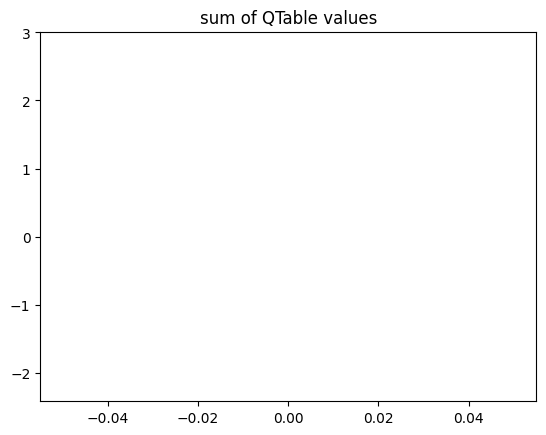

In [50]:
# your code here
# we have 4 actions (every direction) although most of the time we will have only 2 actions available
nb_action = 4

# state will be a 2d array, also counting the impossible states to make it easier for the representation
#size is 4*3 so 12 states
nb_state_x = 3
nb_state_y = 4
nb_state = nb_state_x * nb_state_y


# we create a big matrix to represent the value of each move at a given state
QTable = np.zeros((nb_state_x,nb_state_y,nb_action))

# the tab with the representation of the states (-1 for the bad end, 1 for the good end, and 0 for other states)
reward = np.array([[0,0,0,1],[0,0,0,-1],[0,0,0,0]])
allowed = np.array([[1,1,1,1],[1,0,1,1],[1,1,1,1]])

move_cost = 0.01


# learning rate - should not be too high, e.g. between .5 and .9
alpha = 0.9

# discount factor that shows how much you care about future (remember 0 for myopic)
gamma = 0.5

# exploration / exploitation trade-off
epsilon = 0.1

data = np.zeros((1,1000))

for i in range(1000):
    state = np.array([2,0])
    while reward[state[0], state[1]] == 0:
        actions = []
        if random.random() > epsilon:
            actions = [0, 1, 2, 3]        # random on full possible actions, explore
        else:
            for index, rew in enumerate(QTable[state[0], state[1]]):
                if rew == np.max(QTable[state[0], state[1]]):
                    actions.append(index) # exploit max value
        action = random.choice(actions)

        next_state = state + np.array([1, 0]) if action == 0 else state + np.array([-1, 0]) if action == 1 else state + np.array([0, 1]) if action == 2 else state + np.array([0, -1])
        next_state = np.clip(next_state, [0, 0], [nb_state_x - 1, nb_state_y - 1])
        QTable[state[0], state[1], action] = (1 - alpha) * QTable[state[0], state[1], action] + alpha * (reward[next_state[0], next_state[1]] + gamma * np.max(QTable[next_state[0], next_state[1]])) - move_cost
        if allowed[next_state[0], next_state[1]] == 1:
            state = next_state
        data[0,i] = np.sum(QTable)


print(QTable)


plt.plot(data)
plt.title("sum of QTable values")
plt.show()